In [4]:
# DO NOT MODIFY THIS PART

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
# DO NOT MODIFY THIS PART

X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


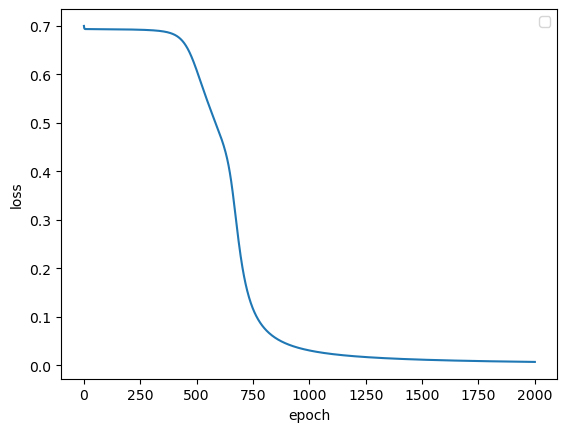

In [6]:
# DO NOT MODIFY THIS PART

model = nn.Sequential(nn.Linear(2, 2, bias=True), nn.Sigmoid(),
                      nn.Linear(2, 1, bias=True), nn.Sigmoid())

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1) 
losses = []

for step in range(2001): 
    optimizer.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()        
    losses.append(cost.item())

plt.plot(losses)
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [7]:
# DO NOT MODIFY THIS PART

Y_hat = model(X)
print('Predicted: ', Y_hat)
print('Actual: ', Y)

Predicted:  tensor([[0.0070],
        [0.9902],
        [0.9937],
        [0.0061]], grad_fn=<SigmoidBackward0>)
Actual:  tensor([[0.],
        [1.],
        [1.],
        [0.]])



Formula of bias for layer 2

$$\frac{\partial L}{\partial b^2} =
\hat{y_1}- y 
$$

Formula of weights of layer 2
$$
\frac{\partial L}{\partial \vec{w}^{\,(2)}} = \begin{bmatrix}
\frac{\partial L}{\partial w^2_{11}}\\
\frac{\partial L}{\partial w^2_{21}}
\end{bmatrix} =
\begin{bmatrix}
(\hat{y_1} - y) h^1_{1} \\
(\hat{y_1} - y) h^1_{2}
\end{bmatrix} 
$$

Formula of biases of layer 1
$$\frac{\partial L}{\partial \vec{b}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial b^1_1}\\
\frac{\partial L}{\partial b^1_2}
\end{bmatrix} =
\begin{bmatrix}
(({\hat{y_1}-y)w^2_{11})h^1_{1}(1-h^1_{1})} \\
(({\hat{y_1}-y)w^2_{21})h^1_{2}(1-h^1_{2})}
\end{bmatrix}
$$

Formula of weights of layer 1
$$
\frac{\partial L}{\partial \vec{W}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial w^1_{11}} & \frac{\partial L}{\partial w^1_{12}}\\
\frac{\partial L}{\partial w^1_{21}} & \frac{\partial L}{\partial w^1_{22}}  
\end{bmatrix} =
\begin{bmatrix}
(({\hat{y_1}-y)w^2_{11})h^1_{1}(1-h^1_{1})x_1} & (({\hat{y_1}-y)w^2_{21})h^1_{2}(1-h^1_{2})x_1} \\
(({\hat{y_1}-y)w^2_{11})h^1_{1}(1-h^1_{1})x_2} & (({\hat{y_1}-y)w^2_{21})h^1_{2}(1-h^1_{2})x_2}
\end{bmatrix}
$$ 

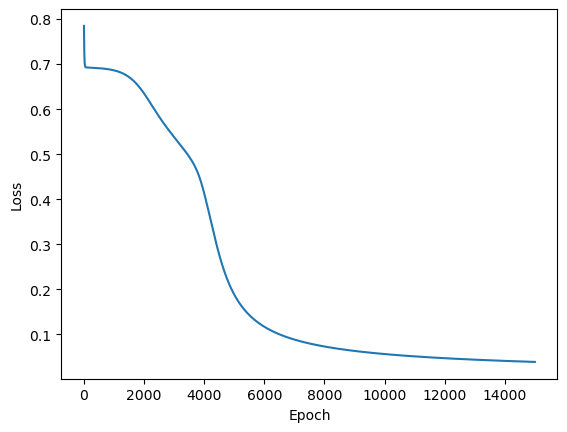

Predicted:
[[0.04096331]
 [0.96321491]
 [0.96337629]
 [0.03902936]]
Actual:
[[0]
 [1]
 [1]
 [0]]
Given x input:
[[0 1]]
Predicted output:
[[0.96321687]]


In [77]:
import numpy as np
import matplotlib.pyplot as plt

class MultiNeuralNetwork:
    
    # setting paramaters 
    def __init__(self, input, hidden, output):
        self.W1 = np.random.uniform(0., 1., (input, hidden)) # 2x2 dim w1
        self.b1 = np.random.uniform(0., 1., (1, hidden)) # 1x2 dim b1
        self.W2 = np.random.uniform(0., 1., (hidden, output)) # 1x2 dim w2
        self.b2 = np.random.uniform(0., 1., (1, output)) # 1x1 dim b2

    # activation both layers
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # activation derivative for backward propgation
    def sigmoid_derivative(self, x):
        return  x * (1 - x)
    
    # loss function binary cross entropy
    def loss_function(self, y):
        return -np.mean(y * np.log(self.y_hat) + (1 - y) * np.log(1 - self.y_hat))

    # loss function binary cross entropy derivative for backward propgation
    def binary_cross_derivative(self, y):
        return self.y_hat - y

    def forward_propagation(self, x):
        # caculating pre&post activation layer 1 
        self.a_1  = self.sigmoid(np.dot(x, self.W1) + self.b1)
        # caculating pre&post activation layer 2
        a_2  = self.sigmoid(np.dot(self.a_1, self.W2) + self.b2)
        self.y_hat =  a_2

    def backward_propagation(self, x, y, n):
        # caculating error
        dy_hat = self.binary_cross_derivative(y)
        # calculating partial derivate w2
        dw_2 = np.dot(self.a_1.T,(dy_hat * self.sigmoid_derivative(self.y_hat)))
        # part (e) Optimize the parameters
        self.W2 -= dw_2 * n
        # calculating partial derivate b2
        db_2 = np.sum((dy_hat * self.sigmoid_derivative(self.y_hat)), axis=0, keepdims=True)
        self.b2 -= db_2 * n
        # calculating partial derivate w1
        da_1 = np.dot((dy_hat * self.sigmoid_derivative(self.y_hat)), self.W2.T)
        dw_1 = np.dot(x.T, (da_1 * self.sigmoid_derivative(self.a_1)))
        self.W1 -= dw_1 * n
        #  calculating partial derivate b1
        db_1 =  np.sum((da_1 * self.sigmoid_derivative(self.a_1)), axis=0, keepdims=True)
        self.b1 -= db_1 * n
        
    
# XOR inputs
X = np.array([[0,0],
     [0,1],
     [1,0],
     [1,1]] )              
# XOR output 
Y = np.array([[0],
              [1],
              [1],
              [0]])

# initialize parameters network architecture
input_size = 2 # 2 set node x1&x2
hidden_size = 2 # 2 hidden nodes 
output_size = 1 # 1 set node y1
n = 0.001 # small positive num

losses = []
np.random.seed(77) # set seed for testing

nn = MultiNeuralNetwork(input_size, hidden_size, output_size)
for epoch in range(15001):
    # traning 
    nn.forward_propagation(X)
    loss = nn.loss_function(Y)
    losses.append(loss)
    nn.backward_propagation(X,Y, learn_rate)


# Part (f) Plotting the epoch #'s and loss 
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

print("Predicted:")
print(nn.y_hat)
print("Actual:")
print(Y)

# part (g) Predict y for a given input x
given_input = np.array([[0, 1]]) # provide any sort of x input 
nn.forward_propagation(given_input)
print("Given x input:")
print(given_input)
print("Predicted output:")
print(nn.y_hat)